# Paper Reading: BERTopic: Neural topic modeling with a class-based TF-IDF procedure

## Definition:
BERTopic a topic modeling technique that leverages `BERT embeddings` and `class-based-TF-IDF` to create dense `clusters` allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

## Limitation of BOW representation in Topic Models(LDA, NMF):
Among Bag-of-Words, neglecting **semantic relationships** among words. 

## Modeling Process 🌟
- Create a document embedding use pretrained LM
- Dimension reduction and clustering the embedding
- Class-based variation TF-IDF to get topic representations
   - re-rank topic words based on their **frequency** in a cluster, the initial samples are still first gain from a centroid-based perspective, instead of considering the **distance** proximate to center.

### 1.Document Embedding
- Use Sentence-BERT framework
   - convert sentences and paragraphs into dense vector representations using pre-trained LM.
   - the smaller and faster model `all-MiniLM-L6-v2` preferable for limited GPU.
### 2.Document Clustering
- Use UMAP Technique, improving the cluster's accuracy and time.
- Hierarchical DBSCAN method, HDBSCAN, soft-clustering approach allowing noise to be modeled as outliers, improving document representations by except unrelated documents.
### 3.Topic Representation
- Each cluster in the document is assigned one topic
- By class-based TF-IDF:

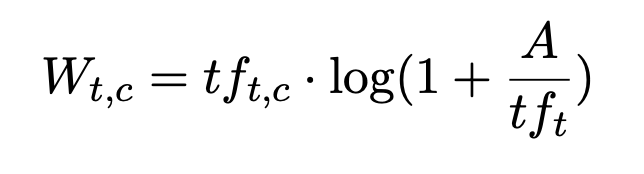
   - **tf**_t,c: the frequency of term t in class c
   - Class c: collection of documents concatenation into a single document for each cluster
   - inverse class frequency: measure how much information a term provides to a class
     - average number of words per class A / the frequency of term t across all term
     - only accept positive number, +1  
- Intuition: Measure the importance of words in clusters, for generating topic-word distribution for each cluster
- Combine the least common topic with the most similar one, reducing the number of topics
### 4.Dynamic Topic Modeling
- Method:
   1. Generating a global representation of topics
   2. Develop a local representations
- Model
  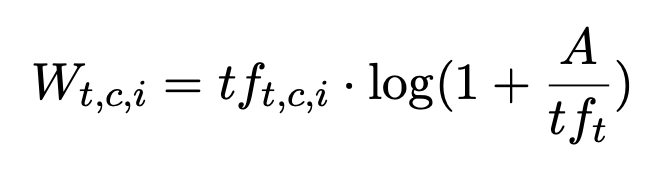
   - i: timestep
### 5.Smoothing
- Assumption: *linearly* evolving topics, assume topic representation at time t is relevant to that of at time t-1
- Normalization: `L1-norm(LASSO)`, preventing from topic representation has disproportionate effects depending on the size of the document.
- For each topic and representation, take the average of Norm(c-tf-idf vector @t) and Norm(c-tf-idf vector @t-1).



## References:
- BERTopic: https://maartengr.github.io/BERTopic/
- Sentence BERT: https://medium.com/genei-technology/richer-sentence-embeddings-using-sentence-bert-part-i-ce1d9e0b1343
- Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks https://arxiv.org/abs/1908.10084
- UMAP. https://umap-learn.readthedocs.io/en/latest/?badge=latest
- Understanding HDBSCAN and Density-Based Clustering. https://medium.com/towards-data-science/understanding-hdbscan-and-density-based-clustering-121dbee1320e
- 


## Project: 2020 Tokyo Olympics Tweets
- dataset: https://www.kaggle.com/datasets/gpreda/tokyo-olympics-2020-tweets?ref=hackernoon.com

In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 2.6 MB/s 
     |████████████████████████████████| 5.2 MB 29.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 41.9 MB/s 
     |████████████████████████████████| 88 kB 4.6 MB/s 
     |████████████████████████████████| 85 kB 4.9 MB/s 
     |████████████████████████████████| 5.5 MB 42.8 MB/s 
     |████████████████████████████████| 1.3 MB 47.5 MB/s 
     |████████████████████████████████| 182 kB 71.9 MB/s 
     |████████████████████████████████| 7.6 MB 46.9 MB/s 
     |████████████████████████████████| 1.1 MB 55.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340726 sha256=08dc84d51d1fee034e771e6b62aa15c06e6a23394acf0ed492ae87e3a4daa329
  Stored in directory: /root/.cache

In [ ]:
from bertopic import BERTopic
import numpy as np
import pandas as pd

### Load Dataset
 `pd.read_csv(...,engine=‘c’| ‘python’| ‘pyarrow’})`
- Parser engine to use. The C and pyarrow engines are faster, while the python engine is currently more feature-complete.

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [ ]:
tweets=pd.read_csv('/content/tokyo_2020_tweets.csv',engine='python')
#only keep first 6000 tweets
tweets=tweets[0:6000]
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39.0,293.0,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5.0,2969.0,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646,3.0,5.0,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975,2724.0,36554.0,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37.0,31.0,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False


### Build Model with BERTopic

In [ ]:
model= BERTopic(verbose=True)                    #create the model
docs = tweets.text.to_list()                     #generate topics
topics, probabilities = model.fit_transform(docs) #Return the tweets with the topics and probabilities

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/188 [00:00<?, ?it/s]

2022-11-29 06:43:53,814 - BERTopic - Transformed documents to Embeddings
2022-11-29 06:44:35,231 - BERTopic - Reduced dimensionality
2022-11-29 06:44:35,542 - BERTopic - Clustered reduced embeddings


In [ ]:
model.get_topic_info()                #access the frequent topics that were generated

,Topic,Count,Name
0,-1,1808,-1_the_and_of_tokyo2020
1,0,287,0_tokyo2020_you_lets_grande
2,1,224,1_vikas_boxing_krishan_okazawa
3,2,206,2_olympics_olympicgames_tokyo2020_games
4,3,206,3_hearty_lifting_puneethrajkumar_49kg
...,...,...,...
104,103,11,103_1st_day_so_wins
105,104,11,104_butterfly_rule_semifinals_25th
106,105,10,105_swevaus_var_commentary_marking
107,106,10,106_swedes_swevaus_clinical_swedish


`-1` refers to all outliers and should typically be ignored.


### Select one topic

In [ ]:
model.get_topic(59)

[('heart', 0.04793944532369934),
 ('proud', 0.04390962732952457),
 ('you', 0.03570354478269467),
 ('olympics', 0.034066571882998775),
 ('mirabaichanu', 0.032914233805789846),
 ('spirits', 0.03271690428888925),
 ('billion', 0.02775629511786605),
 ('indiaattokyo2020', 0.026017905343621237),
 ('olympics2020', 0.025152714439996334),
 ('httpstcosz6wdb7d9j', 0.024312221625703127)]

- Use `BERTopic(language="multilingual")` to select a model that supports 50+ languages.
   - Eg: `model = BERTopic(language="German")`

### Topic Modeling Visualization in Three Ways
- Visualize Topics with `.visualize_topics()`, visualizing topics generated with their sizes and corresponding words, which is similar to *LDavis*.

In [ ]:
model.visualize_topics()

- Visualize Terms use `visualize_barchart`, showing the selected terms for a few topics by creating bar charts out of the c-TF-IDF scores. 

In [ ]:
model.visualize_barchart()

- Visualize Topic Similarities use `visualize_heatmap` method, showing how similar certain topics are to each other.


In [ ]:
model.visualize_heatmap()

- Visualize Topic Hierarchy use `.visualize_hierarchy()`

In [ ]:
model.visualize_hierarchy()

### Topic Reduction
- Deal with the too many topics or too few topics generated situations. 3 Methods:
   - set the number of topics with `BERTopic(nr_topics=n)`, then BERTopic finds similar topics and merge them.
   - to reduce the number of topics automatically with `BERTopic(nr_topics='auto')`
   - to reduce the number of topics after training the model.
   ```new_topics, new_probs = model.reduce_topics(docs, topics, probabilities, nr_topics=15)```

In [23]:
model = BERTopic(nr_topics=20) 

### Make Prediction
To predict a topic of a new document, add a new instance(s) on the `transform` method with `topics, probs = model.transform(new_docs)`